In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 10
DATA_DIR = "data"  # After reorganization

In [7]:

# 2. Data Augmentation and Generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=10
)


In [9]:
train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [11]:
# 3. Load Pretrained Xception (without top layer)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))

# Freeze base
base_model.trainable = False

In [13]:
# 4. Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [17]:
# 5. Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS)


C:\Users\anusr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.5393 - loss: 0.7377 - val_accuracy: 0.5074 - val_loss: 0.7499
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.6025 - loss: 0.6523 - val_accuracy: 0.5245 - val_loss: 0.7463
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 557s 11s/step - accuracy: 0.6315 - loss: 0.6321 - val_accuracy: 0.5000 - val_loss: 0.7853
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6603 - loss: 0.6234 - val_accuracy: 0.4951 - val_loss: 0.8306
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6761 - loss: 0.5817 - val_accuracy: 0.5270 - val_loss: 0.8348
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.6752 - loss: 0.5946 - val_accuracy: 0.5123 - val_loss: 0.9093
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6847 - loss: 0.5796 - val_accuracy: 0.4853 - val_loss: 0.8897
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7356 - loss: 0.5614 - val_accuracy: 0.4681 - val_l

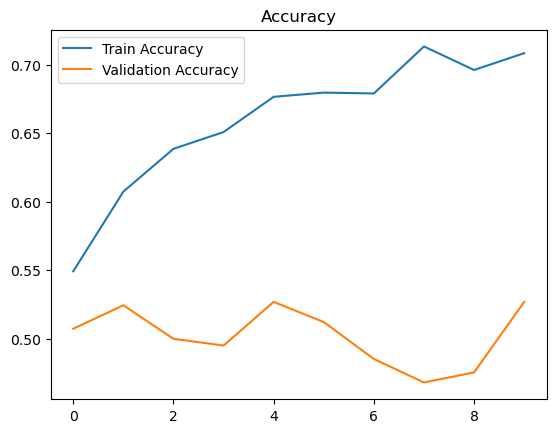

In [19]:
# 7. Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()



In [21]:
model.save("deepfake_detector.h5")
